In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data =pd.read_csv("ahds.csv")

In [5]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# SLIDE 3

## Viewing the top 3 numerical and categorical cols with missing values

In [6]:
###Visualizing the missing values in every column
missing = pd.DataFrame(data.isnull().sum(),columns=["Number"])
missing.sort_values(by = "Number", ascending=False, inplace=True)
missing = missing.loc[(missing!=0).any(axis=1)]
missing.reset_index(inplace=True)
missing.rename(columns={"index":"columns"},inplace=True)


In [7]:
missing_cols = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu',
       'Lot Frontage', 'Garage Cond', 'Garage Finish', 'Garage Yr Blt',
       'Garage Qual', 'Garage Type', 'Bsmt Exposure', 'BsmtFin Type 2',
       'Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1', 'Mas Vnr Area',
       'Mas Vnr Type', 'Bsmt Full Bath', 'Bsmt Half Bath', 'BsmtFin SF 1',
       'Garage Cars', 'Electrical', 'Total Bsmt SF', 'Bsmt Unf SF',
       'BsmtFin SF 2', 'Garage Area']
types = pd.DataFrame(data[missing_cols].dtypes,columns=["type"])
types.reset_index(inplace=True)
types.rename(columns={"index":"columns"},inplace=True)


In [8]:
missing_df= pd.merge(missing, types, on = "columns")

In [131]:
categorical_vals = missing_df[missing_df["type"]=="object"]
categorical_vals.head(3)

,columns,Number,type
0,Pool QC,2917,object
1,Misc Feature,2824,object
2,Alley,2732,object


In [132]:
numerical_vals = missing_df[missing_df["type"]=="float64"]
numerical_vals.head(3)

,columns,Number,type
5,Lot Frontage,490,float64
8,Garage Yr Blt,159,float64
16,Mas Vnr Area,23,float64


## Fixing the missing data in the top 3 columns for both numerical and categorical columns

### categorical fix

In [74]:
## categorical fix
categorical_cols = ['Pool QC', 'Misc Feature', 'Alley']
categorical_data = data[categorical_cols]
categorical_data.describe()

,Pool QC,Misc Feature,Alley
count,13,106,198
unique,4,5,2
top,Ex,Shed,Grvl
freq,4,95,120


In [75]:
for col in categorical_data.columns:
    print(col, categorical_data[col].unique())

Pool QC [nan 'Ex' 'Gd' 'TA' 'Fa']
Misc Feature [nan 'Gar2' 'Shed' 'Othr' 'Elev' 'TenC']
Alley [nan 'Pave' 'Grvl']


In [76]:
for col in categorical_data.columns:
    print(col, categorical_data[col].mode())

Pool QC 0    Ex
1    Gd
Name: Pool QC, dtype: object
Misc Feature 0    Shed
Name: Misc Feature, dtype: object
Alley 0    Grvl
Name: Alley, dtype: object


In [77]:
clean_data = pd.DataFrame()
for col in categorical_data.columns:
    print(col)
    # categorical_data[col].fillna(categorical_data[col].mode()[0])

Pool QC
Misc Feature
Alley


In [78]:
categorical_data["Pool QC"].fillna(categorical_data["Pool QC"].mode()[0],inplace=True)

categorical_data["Misc Feature"].fillna(categorical_data["Misc Feature"].mode()[0],inplace=True)

categorical_data["Alley"].fillna(categorical_data["Alley"].mode()[0],inplace=True)


C:\Users\Jeremy_Gachanja\AppData\Local\Temp\ipykernel_10056\198126263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data["Pool QC"].fillna(categorical_data["Pool QC"].mode()[0],inplace=True)
C:\Users\Jeremy_Gachanja\AppData\Local\Temp\ipykernel_10056\198126263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data["Misc Feature"].fillna(categorical_data["Misc Feature"].mode()[0],inplace=True)
C:\Users\Jeremy_Gachanja\AppData\Local\Temp\ipykernel_10056\198126263.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documen

In [79]:
categorical_data.describe()

,Pool QC,Misc Feature,Alley
count,2930,2930,2930
unique,4,5,2
top,Ex,Shed,Grvl
freq,2921,2919,2852


### Numerical fix

In [101]:
numerical_vals["columns"].unique()
numeric_cols = ['Lot Frontage', 'Garage Yr Blt', 'Mas Vnr Area']
numeric_df = data[numeric_cols]

In [115]:
numeric_df.isnull().sum()

Lot Frontage       0
Garage Yr Blt    159
Mas Vnr Area       0
dtype: int64

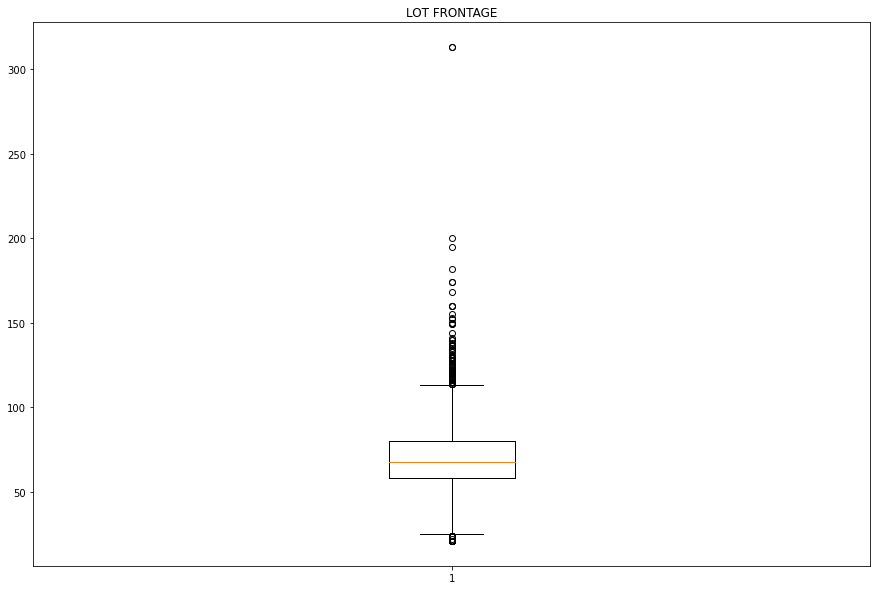

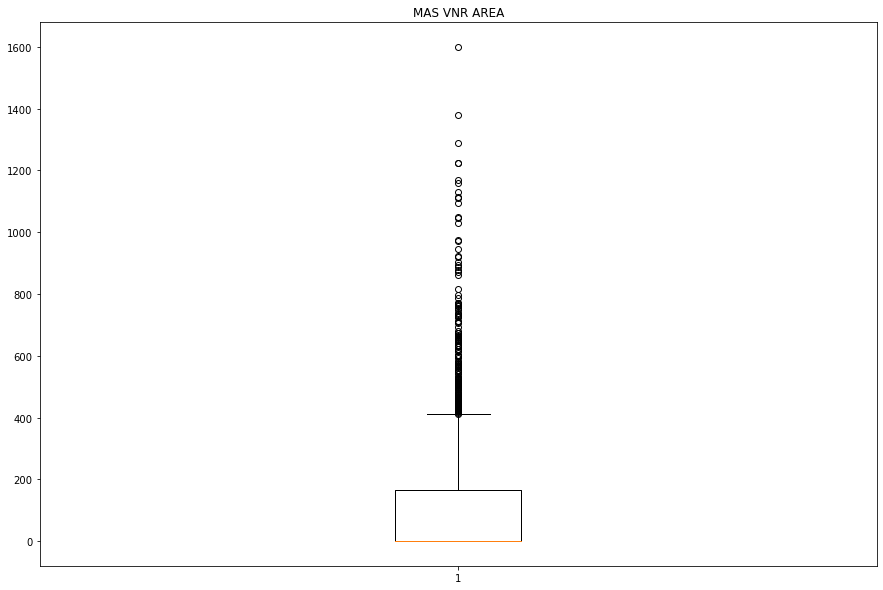

In [103]:
# Checking for outliers in columns 'Lot Frontage' and, 'Mas Vnr Area'
for column in numeric_df[['Lot Frontage','Mas Vnr Area']]:
    plt.figure(figsize=(15,10))
    plt.boxplot(numeric_df[column].dropna())
    plt.title(column.upper())
    plt.show()

In [107]:
numeric_df["Lot Frontage"].median()

68.0

In [125]:
## filling in the missing values in the 2 cols using the median
numeric_df["Lot Frontage"].fillna(numeric_df["Lot Frontage"].median(),inplace=True)

numeric_df["Mas Vnr Area"].fillna(numeric_df["Mas Vnr Area"].median(),inplace=True)



C:\Users\Jeremy_Gachanja\AppData\Local\Temp\ipykernel_10056\3909240523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df["Lot Frontage"].fillna(numeric_df["Lot Frontage"].median(),inplace=True)
C:\Users\Jeremy_Gachanja\AppData\Local\Temp\ipykernel_10056\3909240523.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df["Mas Vnr Area"].fillna(numeric_df["Mas Vnr Area"].median(),inplace=True)


In [116]:
numeric_df.isnull().sum()

Lot Frontage       0
Garage Yr Blt    159
Mas Vnr Area       0
dtype: int64

In [129]:
## Garage yr blt will be filled with the modal year, since the column is a numeric datetime feature
numeric_df["Garage Yr Blt"].fillna(numeric_df["Garage Yr Blt"].mode()[0],inplace=True)

C:\Users\Jeremy_Gachanja\AppData\Local\Temp\ipykernel_10056\3830971228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df["Garage Yr Blt"].fillna(numeric_df["Garage Yr Blt"].mode()[0],inplace=True)


In [130]:
numeric_df.isnull().sum()

Lot Frontage     0
Garage Yr Blt    0
Mas Vnr Area     0
dtype: int64

# SLIDE 2

In [11]:
data.shape

(2930, 82)

In [13]:
data_types = pd.DataFrame(data.dtypes, columns=["type"])
data_types.reset_index(inplace=True)
data_types.rename(columns = {"index":"Col_names"},inplace=True)
categorical = data_types[data_types["type"]=="object"]
numerical =data_types[(data_types["type"]=="float64")|(data_types["type"]=="int64")]
print(categorical.shape[0],numerical.shape[0])



43 39


In [165]:
numerical_data = data.select_dtypes(include=["float64","int64"])

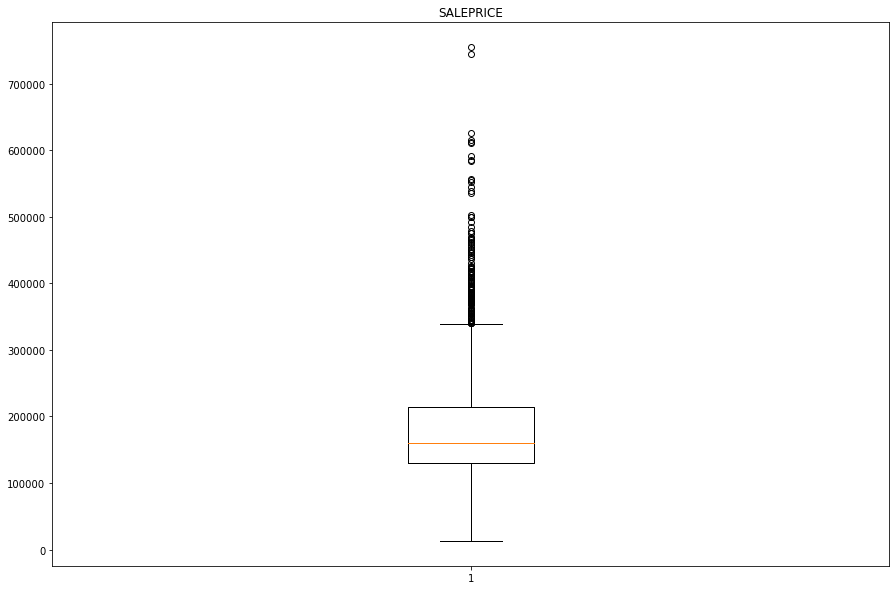

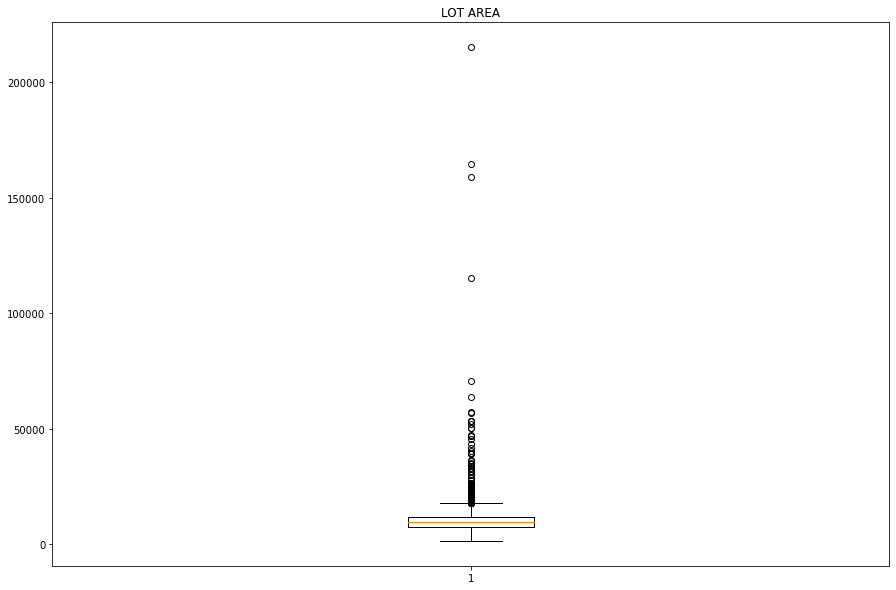

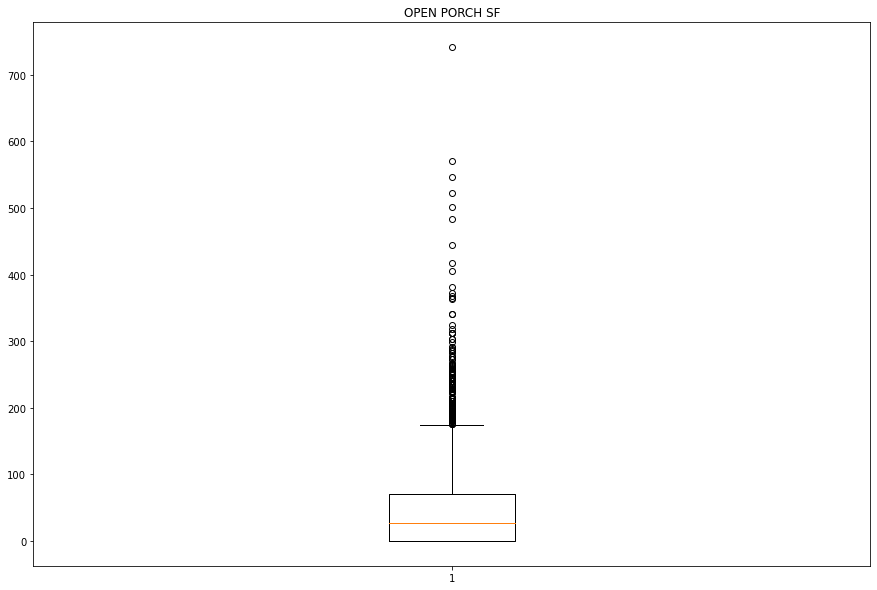

In [167]:
# Replacing outliers using percentile imputation
for column in numerical_data[['SalePrice','Lot Area','Open Porch SF']]:
    plt.figure(figsize=(15,10))
    plt.boxplot(numerical_data[column])
    plt.title(column.upper())
    plt.show()

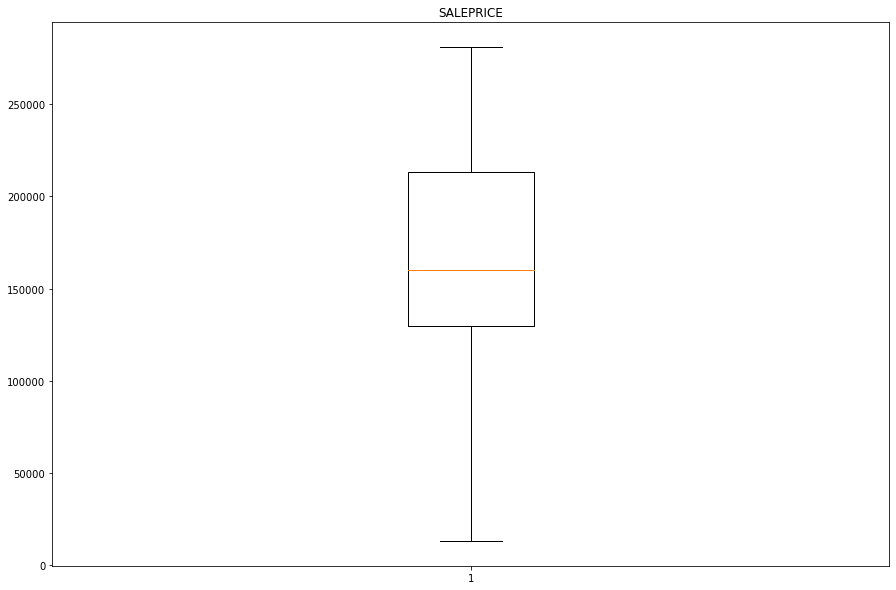

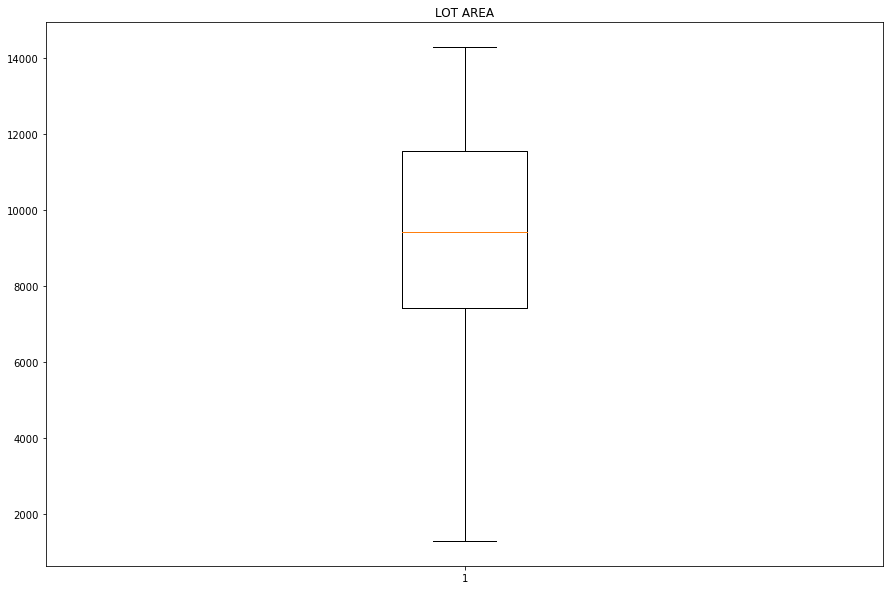

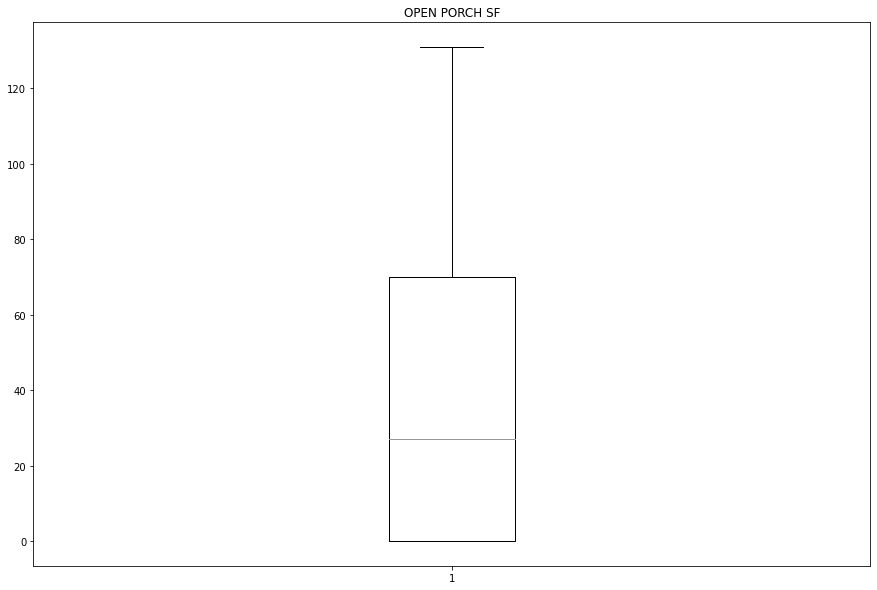

In [168]:
# Replacing outliers using percentile imputation
for column in numerical_data[['SalePrice','Lot Area','Open Porch SF']]:
    # Computing  90th percentiles and replacing the outliers
    ninetieth_percentile = np.percentile(numerical_data[column], 90)
    b = numerical_data[column]
    b = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    plt.figure(figsize=(15,10))
    plt.boxplot(b)
    plt.title(column.upper())
    plt.show()

In [143]:
data[["PID","Order"]]

,PID,Order
0,526301100,1
1,526350040,2
2,526351010,3
3,526353030,4
4,527105010,5
...,...,...
2925,923275080,2926
2926,923276100,2927
2927,923400125,2928
2928,924100070,2929
